In [1]:
import sys
sys.path.append('../')
import src.utils as utils
from importlib import reload
import numpy as np
import matplotlib.pyplot as plt
reload(utils)
import scipy.stats as stat

In [2]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
%config InlineBackend.figure_format = "retina"

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
np.random.seed(2)

## The lognormal distribution of $S_t$

$$
\log S_t \,-\,\log S_0 = \log \frac{S_t}{S_0} =\left(\mu-\frac{1}{2}\sigma^2\right) t + \sigma W_t  \,. 
$$

Thus we can calculate the distribution of $\log \frac{S_t}{S_0}$ as
$$ \log \frac{S_t}{S_0} \sim  N\left(\left(\mu-\frac{1}{2}\sigma^2\right)t,\sigma^2 t\right)$$ 

or equivalently 

$$\log S_t \sim  N\left(\log S_0+\left(\mu-\frac{1}{2}\sigma^2\right)t,\sigma^2 t\right)$$

In [5]:
import scipy
logN = scipy.stats.lognorm(s=1, loc=0.05)

In [6]:
xmin = 0.05
xmax = 4
x = np.linspace(xmin,xmax,num = 1000)
y = logN.pdf(x)

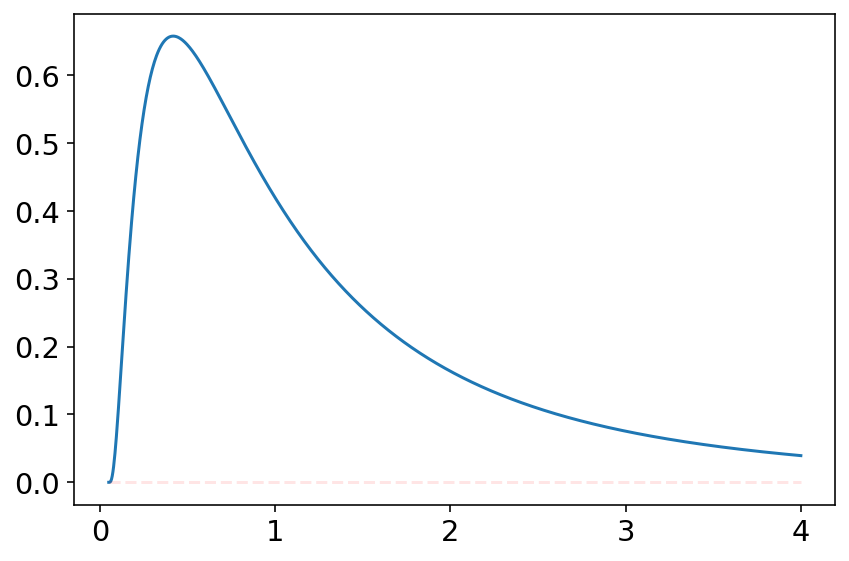

In [7]:
plt.figure()
plt.plot(x, y, linestyle = '-')
resolution_value = 50
plt.tight_layout()
plt.hlines(y = 0, xmin = xmin, xmax = xmax, color = 'r', linestyles='--', alpha = 0.1)
plt.savefig('../figures/log_normal_pdf.pdf', format="pdf", dpi=resolution_value)
plt.show()

## Pricing of a European Call option

In [8]:
S = 1
K = 1.1
sigma = 0.1

t = 0
T = 1

r = 0.05

In [9]:
def d1_BS(S,K,r,sigma,t,T):
    return (np.log(S/K) + (r + 0.5*sigma**2)*(T-t))/(sigma * np.sqrt(T-t))

def d2_BS(S,K,r,sigma,t,T):
    d1 = d1_BS(S,K,r,sigma,t,T)
    return d1 - sigma* np.sqrt(T-t)

def computeBlackScholesCallPrice(t,T,S,r,sigma,K):
    d1 = d1_BS(S,K,r,sigma,t,T)
    d2 = d2_BS(S,K,r,sigma,t,T)
    Nd1 = stat.norm.cdf(d1)
    Nd2 = stat.norm.cdf(d2)
    return S*Nd1 - K*np.exp(-r*(T-t))*Nd2

In [10]:
d1_BS(S,K,r,sigma,t,T)

-0.40310179804324886

In [11]:
d2_BS(S,K,r,sigma,t,T)

-0.5031017980432488

In [12]:
computeBlackScholesCallPrice(t,T,S,r,sigma,K)

0.02173945155462853

In [13]:
def Delta_Call_BS(S,K,r,sigma,t,T):
    d1 = d1_BS(S,K,r,sigma,t,T)
    Nd1 = stat.norm.cdf(d1)
    return Nd1

In [14]:
Delta_Call_BS(S,K,r,sigma,t,T)

0.343436668962647

In [15]:
def Gamma_Call_BS(S,K,r,sigma,t,T):
    d1 = d1_BS(S,K,r,sigma,t,T)
    nd1 = stat.norm.pdf(d1)
    return nd1/(S*sigma*np.sqrt(T-t))

In [16]:
Gamma_Call_BS(S,K,r,sigma,t,T)

3.678117344101192

In [17]:
def Vega_Call_BS(S,K,r,sigma,t,T):
    d1 = d1_BS(S,K,r,sigma,t,T)
    nd1 = stat.norm.pdf(d1)
    return nd1*S*np.sqrt(T-t)

In [18]:
Vega_Call_BS(S,K,r,sigma,t,T)

0.3678117344101192